In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"processing/arenson/arenson_updated.dat")
data

27/05/24 - 10:47:21 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 57 data: 925, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

27/05/24 - 10:47:34 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
27/05/24 - 10:47:38 - pyGIMLi - INFO - Save RVector binary
27/05/24 - 10:47:38 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\162931402017577431
27/05/24 - 10:47:38 - pyGIMLi - INFO - Save RVector binary
27/05/24 - 10:47:38 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\652702588648680815


925 [16.82973002902715,...,16.777984803820342]

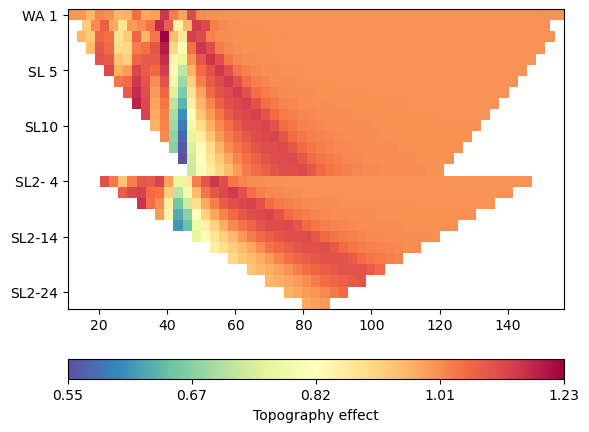

In [5]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x196a4d94c10>)

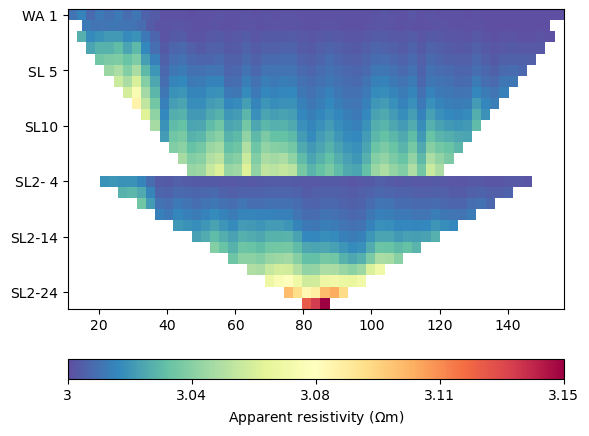

In [6]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x196a4b1f310>)

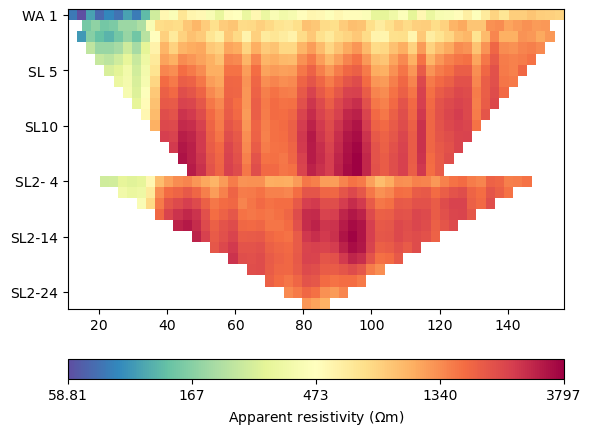

In [7]:
ert.showData(data)

27/05/24 - 10:47:54 - pyGIMLi - INFO - Found 2 regions.
27/05/24 - 10:47:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/05/24 - 10:47:54 - pyGIMLi - INFO - Found 2 regions.
27/05/24 - 10:47:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/05/24 - 10:47:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/05/24 - 10:47:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/05/24 - 10:47:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3036 Cells: 5668 Boundaries: 4452
27/05/24 - 10:47:54 - pyGIMLi - INFO - Use median(data values)=1628.574
27/05/24 - 10:47:54 - pyGIMLi - INFO - Created startmodel from forward operator: 1206, min/max=1628.574000/1628.574000
27/05/24 - 10:47:54 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000196FF6DD620>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000019699007CE0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000196FF384270>
min/max (data): 58.81/3797
min/max (error): 3%/3.15%
min/max (start model): 1629/1629
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  550.84
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   89.32 (dPhi = 83.49%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   14.62 (dPhi = 80.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.78 (dPhi = 41.40%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.11 (dPhi = 36.28%) lam: 20.0
------------

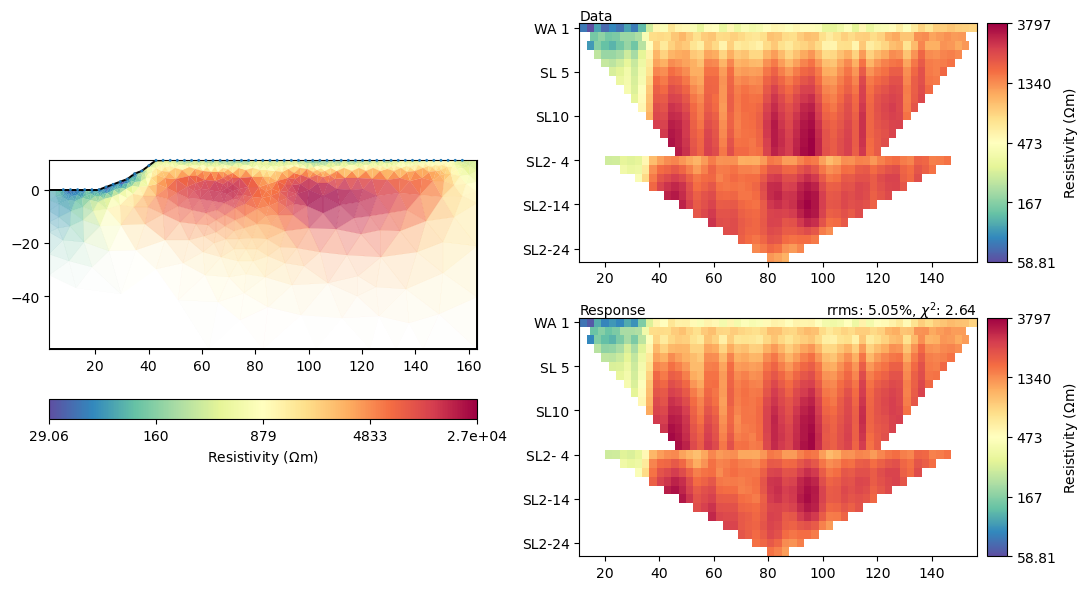

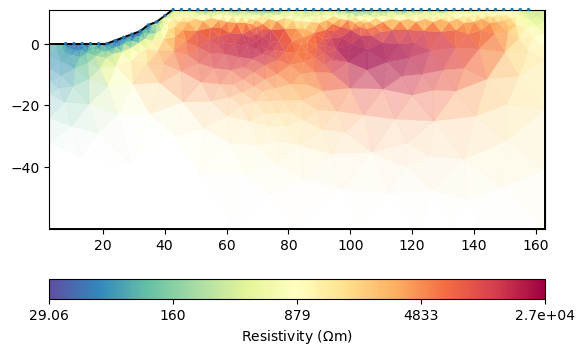

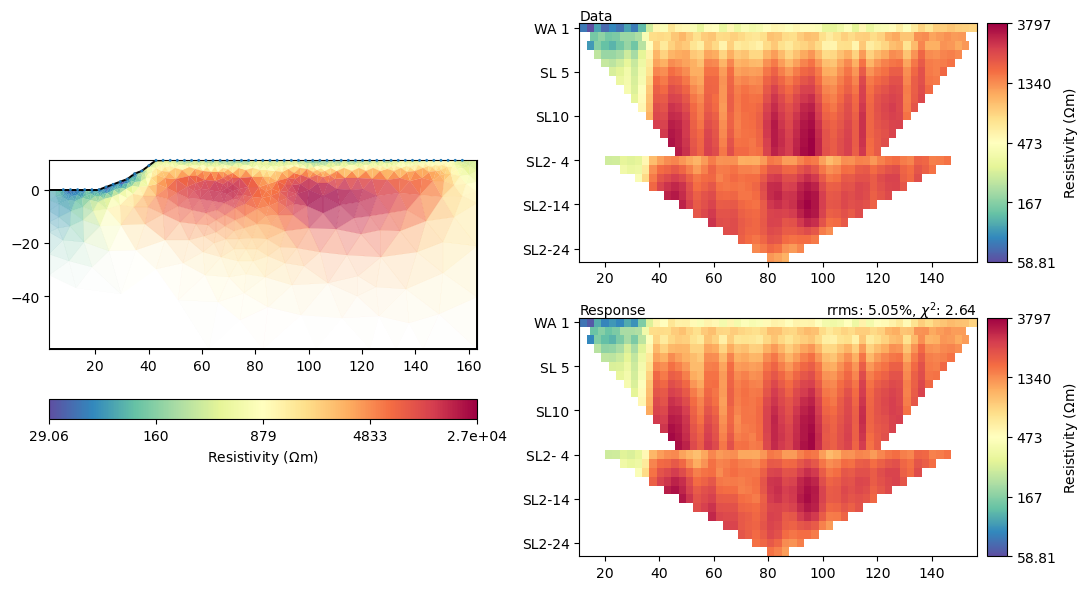

In [8]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

27/05/24 - 10:49:19 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

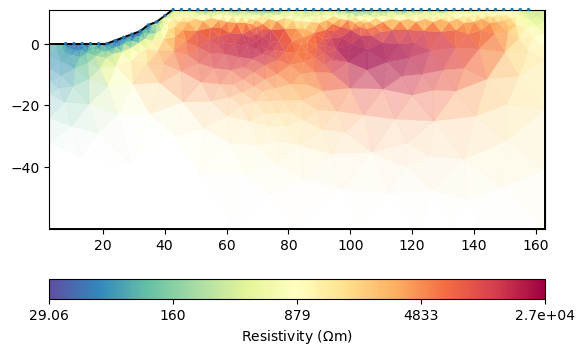

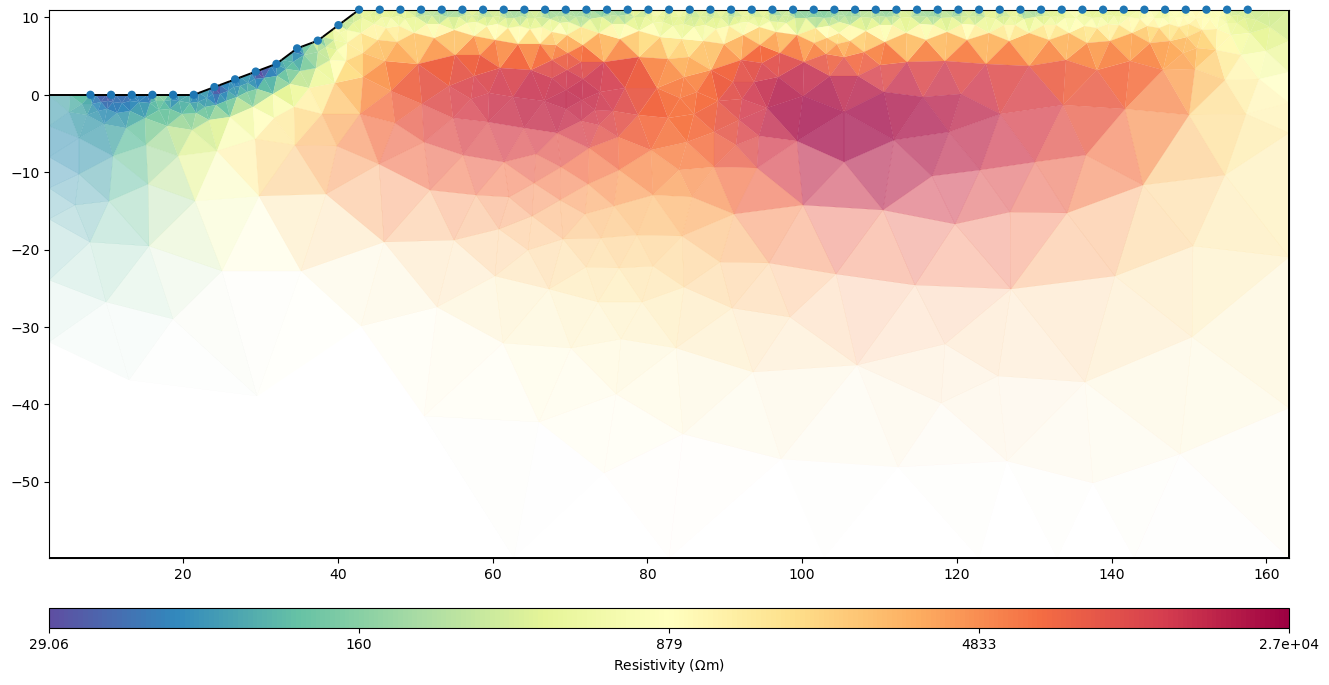

In [9]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/arenson_updated')